Model Accuracy Scores:
Logistic Regression: 0.6154
SVM: 0.6231
Naive Bayes: 0.7769
Random Forest: 0.6462
Logistic Regression (LOO): 0.7308


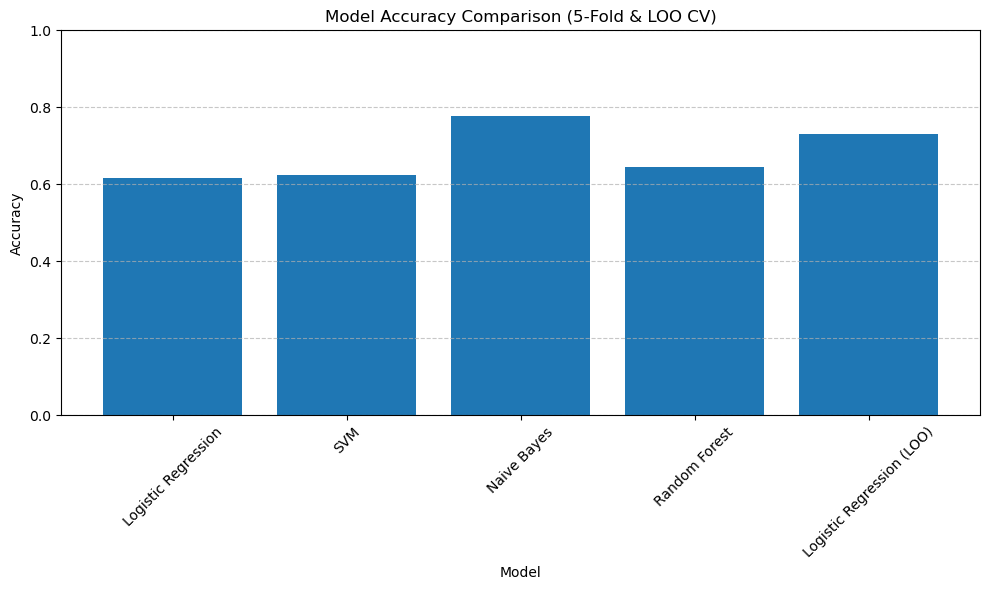

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv(r"D:\Documents\Sem_3\IS733\lab11\data_stories_one_shot.csv")  # Ensure the file is in the same directory

# Create binary labels: Stage 1 = Show (0), Stage 2 or 3 = Tell (1)
df['label'] = df['Stage'].apply(lambda x: 0 if x == 1 else 1)

# Define minimal stopwords
custom_stopwords = set([
    'the', 'is', 'in', 'and', 'to', 'with', 'a', 'of', 'for', 'on', 'that',
    'this', 'as', 'an', 'by', 'at', 'from', 'or', 'be', 'are', 'it'
])

# Simple preprocessing function
def simple_preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [t for t in tokens if t not in custom_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['Sentence'].apply(simple_preprocess)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

# Perform 5-Fold Cross-Validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    cv_results[name] = scores.mean()

# Perform Leave-One-Out CV for Logistic Regression
loo = LeaveOneOut()
loo_model = LogisticRegression(max_iter=1000)
loo_scores = cross_val_score(loo_model, X, y, cv=loo)
cv_results["Logistic Regression (LOO)"] = loo_scores.mean()

# Print results
print("Model Accuracy Scores:")
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")

# Plotting model comparison
def plot_model_accuracies(results_dict):
    models = list(results_dict.keys())
    accuracies = list(results_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison (5-Fold & LOO CV)")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize
plot_model_accuracies(cv_results)
